<a href="https://colab.research.google.com/github/rassamyjs/DS-Unit-1-Build/blob/master/Copy_of_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [8]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',
                 parse_dates=['created'],
                 index_col='created')
#assert df.shape == (49352, 34)

In [3]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

# EDA

In [10]:
df.shape

(49352, 33)

In [ ]:
df.info()

In [ ]:
df.head(20)

In [54]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Find a relationship

In [13]:
import matplotlib.pyplot as plt


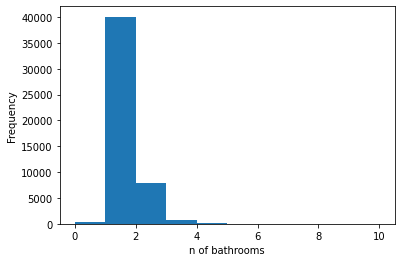

In [34]:
df['bathrooms'].plot(kind='hist')
plt.xlabel('n of bathrooms');

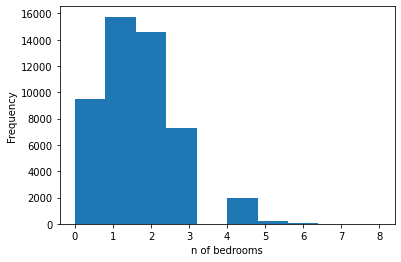

In [35]:
df['bedrooms'].plot(kind='hist')
plt.xlabel('n of bedrooms');

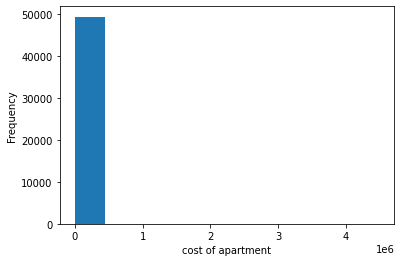

In [39]:
df['price'].plot(kind='hist')
plt.xlabel('cost of apartment');

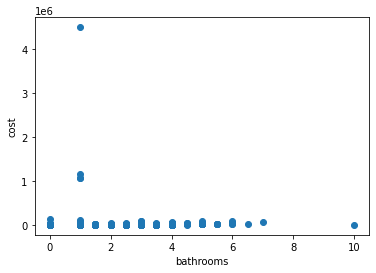

In [49]:
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('bathrooms')
plt.ylabel('cost');

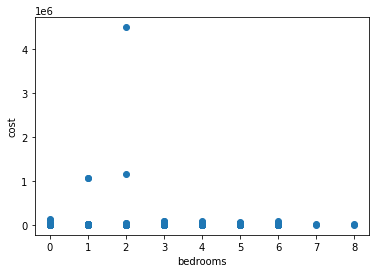

In [46]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('cost');

# Is there a corelation between the number of rooms and the price?

In [63]:
df[['bathrooms', 'bedrooms', 'price', 'total_rooms', 'EST_cost', 'error']].head()

,bathrooms,bedrooms,price,total_rooms,EST_cost,error
created,,,,,,
2016-06-24 07:54:24,1.5,3,3000,4.5,6412.5,3412.5
2016-06-12 12:19:27,1.0,2,5465,3.0,4275.0,1190.0
2016-04-17 03:26:41,1.0,1,2850,2.0,2850.0,0.0
2016-04-18 02:22:02,1.0,1,3275,2.0,2850.0,425.0
2016-04-28 01:32:41,1.0,4,3350,5.0,7125.0,3775.0


In [58]:
2850 / 2
# estimated price would be price divided by n of rooms

1425.0

In [60]:
# function for estimate price to rent an apartment
def price_range(room):
  cost = room * 1425
  return cost
df['EST_cost'] = df['total_rooms'].apply(price_range)


In [64]:
# look for absolute difference

df['error'] = abs(df['price'] - df['EST_cost'])
df['error'].mean()

1479.480861971146

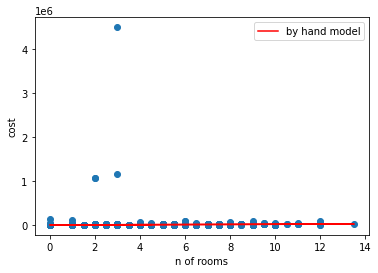

In [69]:
plt.scatter(df['total_rooms'], df['price'])
plt.plot(df['total_rooms'], df['EST_cost'], color='r', label='by hand model')
plt.xlabel('n of rooms')
plt.legend()
plt.ylabel('cost');

## The number of rooms should increase the cost to rent an apartment.

# Scikit-learn method

In [73]:
#split data

target = 'price'
y = df[target]
X = df[['total_rooms']]

(49352,)

In [75]:
# confirm dimensions
print(y.shape)
print(X.shape)
X.head()

(49352,)
(49352, 1)


,total_rooms
created,
2016-06-24 07:54:24,4.5
2016-06-12 12:19:27,3.0
2016-04-17 03:26:41,2.0
2016-04-18 02:22:02,2.0
2016-04-28 01:32:41,5.0


In [76]:
# baseline
y.mean()


3830.174035500081

In [85]:
from sklearn.metrics import mean_absolute_error
print('Baseline MAE:', mean_absolute_error(y, [y.mean()]*len(y)))

Baseline MAE: 1549.6424487275


In [86]:
# linear regession model
# import
from sklearn.linear_model import LinearRegression
# instantiate
model = LinearRegression()
# train the model
model.fit(X,y)
# predict
y_predict = model.predict(X)


In [87]:
# Check metrics
print('Training MAE:', mean_absolute_error(y, y_predict))

Training MAE: 1227.0061056686068


In [89]:
# interpret
print(model.coef_)
print(model.intercept_)

[977.9307045]
1137.1293910945901


Formula will be: Price = 1137.13 + 977.93 x n_of_room

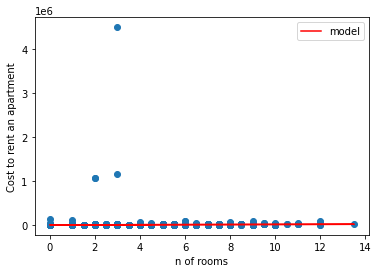

In [90]:
# plot
plt.scatter(X, y)
plt.plot(X, y_predict, color='r', label='model')
plt.legend()
plt.xlabel('n of rooms')
plt.ylabel('Cost to rent an apartment');